In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-04-10 03:00:24.483698: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
com='AMAZON'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end,interval = '1h')
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-04-10 09:30:00-04:00,161.419998,162.000000,160.080002,160.154999,160.154999,15225797,APPLE
2023-04-10 10:30:00-04:00,160.160004,161.399994,160.145004,161.134995,161.134995,6669628,APPLE
2023-04-10 11:30:00-04:00,161.140793,161.610001,160.600006,160.820801,160.820801,4330948,APPLE
2023-04-10 12:30:00-04:00,160.830002,161.613098,160.820007,161.569901,161.569901,4302297,APPLE
2023-04-10 13:30:00-04:00,161.570007,161.839996,161.309998,161.714996,161.714996,3461730,APPLE
...,...,...,...,...,...,...,...
2024-04-09 11:30:00-04:00,152.839996,154.119995,152.380005,152.906693,152.906693,697686,GENERAL_ELC
2024-04-09 12:30:00-04:00,152.940002,153.389999,152.539993,153.125000,153.125000,646135,GENERAL_ELC
2024-04-09 13:30:00-04:00,153.112000,153.410004,152.259995,153.080002,153.080002,535581,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-04-10 09:30:00-04:00,161.419998,162.000000,160.080002,160.154999,160.154999,15225797,APPLE
1,2023-04-10 10:30:00-04:00,160.160004,161.399994,160.145004,161.134995,161.134995,6669628,APPLE
2,2023-04-10 11:30:00-04:00,161.140793,161.610001,160.600006,160.820801,160.820801,4330948,APPLE
3,2023-04-10 12:30:00-04:00,160.830002,161.613098,160.820007,161.569901,161.569901,4302297,APPLE
4,2023-04-10 13:30:00-04:00,161.570007,161.839996,161.309998,161.714996,161.714996,3461730,APPLE
...,...,...,...,...,...,...,...,...
17555,2024-04-09 11:30:00-04:00,152.839996,154.119995,152.380005,152.906693,152.906693,697686,GENERAL_ELC
17556,2024-04-09 12:30:00-04:00,152.940002,153.389999,152.539993,153.125000,153.125000,646135,GENERAL_ELC
17557,2024-04-09 13:30:00-04:00,153.112000,153.410004,152.259995,153.080002,153.080002,535581,GENERAL_ELC
17558,2024-04-09 14:30:00-04:00,153.095993,154.500000,152.982498,154.440002,154.440002,813927,GENERAL_ELC


In [11]:
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-04-10 09:30:00-04:00,161.419998,162.000000,160.080002,160.154999,160.154999,15225797,APPLE
2023-04-10 10:30:00-04:00,160.160004,161.399994,160.145004,161.134995,161.134995,6669628,APPLE
2023-04-10 11:30:00-04:00,161.140793,161.610001,160.600006,160.820801,160.820801,4330948,APPLE
2023-04-10 12:30:00-04:00,160.830002,161.613098,160.820007,161.569901,161.569901,4302297,APPLE
2023-04-10 13:30:00-04:00,161.570007,161.839996,161.309998,161.714996,161.714996,3461730,APPLE
...,...,...,...,...,...,...,...
2024-04-09 11:30:00-04:00,152.839996,154.119995,152.380005,152.906693,152.906693,697686,GENERAL_ELC
2024-04-09 12:30:00-04:00,152.940002,153.389999,152.539993,153.125000,153.125000,646135,GENERAL_ELC
2024-04-09 13:30:00-04:00,153.112000,153.410004,152.259995,153.080002,153.080002,535581,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Datetime,
2023-04-10 09:30:00-04:00,160.154999
2023-04-10 10:30:00-04:00,161.134995
2023-04-10 11:30:00-04:00,160.820801
2023-04-10 12:30:00-04:00,161.569901
2023-04-10 13:30:00-04:00,161.714996
...,...
2024-04-09 11:30:00-04:00,152.906693
2024-04-09 12:30:00-04:00,153.125000
2024-04-09 13:30:00-04:00,153.080002


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

15014

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.53550403],
       [-0.53234475],
       [-0.53335764],
       ...,
       [-0.55831215],
       [-0.55392783],
       [-0.55376663]])

In [16]:
train_set, test_set = scaled_data[:training_data_len], scaled_data[training_data_len:]

In [17]:
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-04-10 09:30:00-04:00,100.959999,101.040001,99.570000,100.099998,100.099998,10913644,AMAZON
2023-04-10 10:30:00-04:00,100.109901,101.300003,100.070000,101.180000,101.180000,5605871,AMAZON
2023-04-10 11:30:00-04:00,101.190002,101.399902,100.449997,100.879997,100.879997,3877094,AMAZON
2023-04-10 12:30:00-04:00,100.879997,101.830002,100.860001,101.790100,101.790100,3547284,AMAZON
2023-04-10 13:30:00-04:00,101.809998,102.019997,101.512001,101.879997,101.879997,3574422,AMAZON
...,...,...,...,...,...,...,...
2024-04-09 11:30:00-04:00,185.021393,185.826706,184.889999,185.444901,185.444901,2916307,AMAZON
2024-04-09 12:30:00-04:00,185.449997,185.720001,184.910004,185.020004,185.020004,2842575,AMAZON
2024-04-09 13:30:00-04:00,185.009995,185.119904,184.354996,184.770004,184.770004,3051522,AMAZON


In [18]:
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [19]:
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction

In [20]:
residuals.shape

(790, 790)

In [21]:
X_train = residuals[:-1].reshape(-1, 1)
y_train = residuals[1:].reshape(-1, 1)

In [22]:
ann_model = Sequential()
ann_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(1))
ann_model.compile(loss='mean_squared_error', optimizer='adam')
ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [23]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = ann_model.fit(X_train, y_train, batch_size=1, epochs=1)

623310/623310 [==============================] - 345s 553us/step - loss: 7.1007e-06


In [25]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [26]:
dataset

,Close
Datetime,
2023-04-10 09:30:00-04:00,160.154999
2023-04-10 10:30:00-04:00,161.134995
2023-04-10 11:30:00-04:00,160.820801
2023-04-10 12:30:00-04:00,161.569901
2023-04-10 13:30:00-04:00,161.714996
...,...
2024-04-09 11:30:00-04:00,152.906693
2024-04-09 12:30:00-04:00,153.125000
2024-04-09 13:30:00-04:00,153.080002


In [27]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Datetime,
2023-10-25 13:30:00-04:00,89.437347
2023-10-25 14:30:00-04:00,89.217796
2023-10-25 15:30:00-04:00,88.754990
2023-10-26 09:30:00-04:00,86.292900
2023-10-26 10:30:00-04:00,86.536316
...,...
2024-04-09 11:30:00-04:00,152.906693
2024-04-09 12:30:00-04:00,153.125000
2024-04-09 13:30:00-04:00,153.080002


In [28]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [29]:
x_test = np.array(x_test)

In [30]:
x_test

array([[-0.76915411, -0.77032475, -0.76906407, ..., -0.75940306,
        -0.7607924 , -0.76184725],
       [-0.77032475, -0.76906407, -0.77085217, ..., -0.7607924 ,
        -0.76184725, -0.76348102],
       [-0.76906407, -0.77085217, -0.77155971, ..., -0.76184725,
        -0.76348102, -0.7641888 ],
       ...,
       [-0.5954877 , -0.59276046, -0.59263183, ..., -0.55911809,
        -0.55887085, -0.55816708],
       [-0.59276046, -0.59263183, -0.59137112, ..., -0.55887085,
        -0.55816708, -0.55831215],
       [-0.59263183, -0.59137112, -0.5923874 , ..., -0.55816708,
        -0.55831215, -0.55392783]])

In [31]:
x_test_mean_array = []
for sub in x_test:
    x_test_mean = np.mean(sub)
    x_test_mean_array.append(x_test_mean)

In [32]:
predictions = ann_model.predict(x_test_mean_array)
predictions

25/25 [==============================] - 0s 667us/step


array([[-0.7646988 ],
       [-0.7646053 ],
       [-0.7645042 ],
       [-0.76444864],
       [-0.76449406],
       [-0.7645149 ],
       [-0.76456046],
       [-0.7646053 ],
       [-0.7646456 ],
       [-0.7647147 ],
       [-0.7647684 ],
       [-0.7648532 ],
       [-0.7649045 ],
       [-0.7649877 ],
       [-0.76510113],
       [-0.76524156],
       [-0.7653858 ],
       [-0.7655681 ],
       [-0.76562613],
       [-0.7656711 ],
       [-0.7657125 ],
       [-0.7657316 ],
       [-0.76569706],
       [-0.76563287],
       [-0.76559025],
       [-0.7655873 ],
       [-0.7655492 ],
       [-0.7654835 ],
       [-0.76541436],
       [-0.76535976],
       [-0.7653313 ],
       [-0.7653249 ],
       [-0.7653973 ],
       [-0.7654618 ],
       [-0.76549643],
       [-0.7655197 ],
       [-0.7655015 ],
       [-0.76545787],
       [-0.76542056],
       [-0.76535654],
       [-0.76528364],
       [-0.7652239 ],
       [-0.76515406],
       [-0.76516503],
       [-0.7651694 ],
       [-0

In [33]:
len(predictions)

790

In [34]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [35]:
predictions = scaler.inverse_transform(predictions)

In [36]:
mse = np.mean(predictions -f_app)
mse

8.759974980492972

In [37]:
predictions

array([[ 89.05959 ],
       [ 89.08861 ],
       [ 89.119965],
       [ 89.13719 ],
       [ 89.12311 ],
       [ 89.11664 ],
       [ 89.10251 ],
       [ 89.08861 ],
       [ 89.0761  ],
       [ 89.05466 ],
       [ 89.038   ],
       [ 89.01171 ],
       [ 88.99579 ],
       [ 88.96998 ],
       [ 88.93479 ],
       [ 88.891235],
       [ 88.84649 ],
       [ 88.78995 ],
       [ 88.77194 ],
       [ 88.758   ],
       [ 88.74515 ],
       [ 88.739235],
       [ 88.74994 ],
       [ 88.76985 ],
       [ 88.78307 ],
       [ 88.784   ],
       [ 88.795815],
       [ 88.816185],
       [ 88.83763 ],
       [ 88.85457 ],
       [ 88.86339 ],
       [ 88.86539 ],
       [ 88.84292 ],
       [ 88.822914],
       [ 88.81217 ],
       [ 88.80496 ],
       [ 88.8106  ],
       [ 88.824135],
       [ 88.83571 ],
       [ 88.85557 ],
       [ 88.87818 ],
       [ 88.896706],
       [ 88.91837 ],
       [ 88.91497 ],
       [ 88.91363 ],
       [ 88.91203 ],
       [ 88.92228 ],
       [ 88.9

In [38]:
import random
random.random()

0.30534157581074206

In [39]:
  Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [40]:
  Final_pred

array([[ 77.83545 ],
       [ 77.86446 ],
       [ 77.89582 ],
       [ 77.91305 ],
       [ 77.898964],
       [ 77.892494],
       [ 77.878365],
       [ 77.86446 ],
       [ 77.85196 ],
       [ 77.83051 ],
       [ 77.81386 ],
       [ 77.78757 ],
       [ 77.771645],
       [ 77.745834],
       [ 77.71065 ],
       [ 77.66709 ],
       [ 77.622345],
       [ 77.5658  ],
       [ 77.5478  ],
       [ 77.53386 ],
       [ 77.521   ],
       [ 77.51509 ],
       [ 77.525795],
       [ 77.54571 ],
       [ 77.55893 ],
       [ 77.55985 ],
       [ 77.57167 ],
       [ 77.59204 ],
       [ 77.61349 ],
       [ 77.630424],
       [ 77.639244],
       [ 77.64124 ],
       [ 77.618774],
       [ 77.59877 ],
       [ 77.58803 ],
       [ 77.58082 ],
       [ 77.58646 ],
       [ 77.59999 ],
       [ 77.611565],
       [ 77.631424],
       [ 77.65404 ],
       [ 77.67256 ],
       [ 77.69423 ],
       [ 77.69083 ],
       [ 77.68948 ],
       [ 77.68789 ],
       [ 77.698135],
       [ 77.7

In [41]:
    train = df_rest
    data = df_app['Close'].values
    len(data)

1756

In [42]:
    len(data[138:252])

114

In [43]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [44]:
    valid

,Close_app,Predictions
0,100.099998,77.835449
1,101.180000,77.864464
2,100.879997,77.895821
3,101.790100,77.913048
4,101.879997,77.898964
...,...,...
785,137.470505,135.839493
786,137.598495,136.067276
787,137.789993,136.307419
788,136.985001,136.497406


In [45]:
    dfxf

,Datetime,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-04-10 09:30:00-04:00,161.419998,162.000000,160.080002,160.154999,160.154999,15225797,APPLE
1,2023-04-10 10:30:00-04:00,160.160004,161.399994,160.145004,161.134995,161.134995,6669628,APPLE
2,2023-04-10 11:30:00-04:00,161.140793,161.610001,160.600006,160.820801,160.820801,4330948,APPLE
3,2023-04-10 12:30:00-04:00,160.830002,161.613098,160.820007,161.569901,161.569901,4302297,APPLE
4,2023-04-10 13:30:00-04:00,161.570007,161.839996,161.309998,161.714996,161.714996,3461730,APPLE
...,...,...,...,...,...,...,...,...
17555,2024-04-09 11:30:00-04:00,152.839996,154.119995,152.380005,152.906693,152.906693,697686,GENERAL_ELC
17556,2024-04-09 12:30:00-04:00,152.940002,153.389999,152.539993,153.125000,153.125000,646135,GENERAL_ELC
17557,2024-04-09 13:30:00-04:00,153.112000,153.410004,152.259995,153.080002,153.080002,535581,GENERAL_ELC
17558,2024-04-09 14:30:00-04:00,153.095993,154.500000,152.982498,154.440002,154.440002,813927,GENERAL_ELC


In [46]:
    dfxfs = dfxf[['Datetime', 'Close']]
    dfxfs

,Datetime,Close
0,2023-04-10 09:30:00-04:00,160.154999
1,2023-04-10 10:30:00-04:00,161.134995
2,2023-04-10 11:30:00-04:00,160.820801
3,2023-04-10 12:30:00-04:00,161.569901
4,2023-04-10 13:30:00-04:00,161.714996
...,...,...
17555,2024-04-09 11:30:00-04:00,152.906693
17556,2024-04-09 12:30:00-04:00,153.125000
17557,2024-04-09 13:30:00-04:00,153.080002
17558,2024-04-09 14:30:00-04:00,154.440002


In [47]:
    dfxf['Datetime']

0        2023-04-10 09:30:00-04:00
1        2023-04-10 10:30:00-04:00
2        2023-04-10 11:30:00-04:00
3        2023-04-10 12:30:00-04:00
4        2023-04-10 13:30:00-04:00
                   ...            
17555    2024-04-09 11:30:00-04:00
17556    2024-04-09 12:30:00-04:00
17557    2024-04-09 13:30:00-04:00
17558    2024-04-09 14:30:00-04:00
17559    2024-04-09 15:30:00-04:00
Name: Datetime, Length: 17560, dtype: object

In [48]:
    import datetime
    def str_to_datetime(s):
      split = s.split('-')
      year, month, day = int(split[0]), int(split[1]), int(split[2])
      return datetime.datetime(year=year, month=month, day=day)
    datetime_object = str_to_datetime('1986-03-19')
    datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [49]:
    dfxfs.index = dfxfs.pop('Datetime')
    dfxfs

,Close
Datetime,
2023-04-10 09:30:00-04:00,160.154999
2023-04-10 10:30:00-04:00,161.134995
2023-04-10 11:30:00-04:00,160.820801
2023-04-10 12:30:00-04:00,161.569901
2023-04-10 13:30:00-04:00,161.714996
...,...
2024-04-09 11:30:00-04:00,152.906693
2024-04-09 12:30:00-04:00,153.125000
2024-04-09 13:30:00-04:00,153.080002


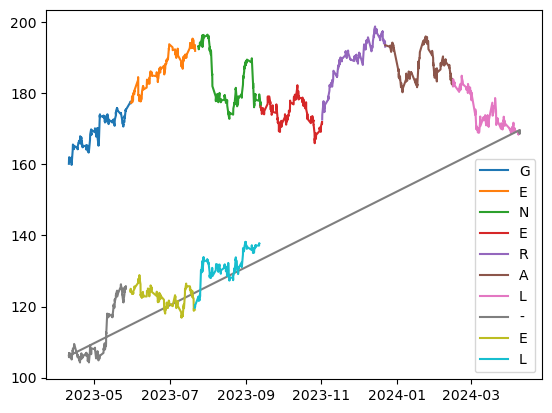

In [50]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [51]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Datetime,,,,,,,
2023-04-10 09:30:00-04:00,100.959999,101.040001,99.570000,100.099998,100.099998,10913644,AMAZON
2023-04-10 10:30:00-04:00,100.109901,101.300003,100.070000,101.180000,101.180000,5605871,AMAZON
2023-04-10 11:30:00-04:00,101.190002,101.399902,100.449997,100.879997,100.879997,3877094,AMAZON
2023-04-10 12:30:00-04:00,100.879997,101.830002,100.860001,101.790100,101.790100,3547284,AMAZON
2023-04-10 13:30:00-04:00,101.809998,102.019997,101.512001,101.879997,101.879997,3574422,AMAZON
...,...,...,...,...,...,...,...
2024-04-09 11:30:00-04:00,185.021393,185.826706,184.889999,185.444901,185.444901,2916307,AMAZON
2024-04-09 12:30:00-04:00,185.449997,185.720001,184.910004,185.020004,185.020004,2842575,AMAZON
2024-04-09 13:30:00-04:00,185.009995,185.119904,184.354996,184.770004,184.770004,3051522,AMAZON


In [52]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [53]:
    df_app_c

,Close
Datetime,
2023-04-10 09:30:00-04:00,100.099998
2023-04-10 10:30:00-04:00,101.180000
2023-04-10 11:30:00-04:00,100.879997
2023-04-10 12:30:00-04:00,101.790100
2023-04-10 13:30:00-04:00,101.879997
...,...
2024-04-09 11:30:00-04:00,185.444901
2024-04-09 12:30:00-04:00,185.020004
2024-04-09 13:30:00-04:00,184.770004


In [54]:
    dfxfs

,Close
Datetime,
2023-04-10 09:30:00-04:00,160.154999
2023-04-10 10:30:00-04:00,161.134995
2023-04-10 11:30:00-04:00,160.820801
2023-04-10 12:30:00-04:00,161.569901
2023-04-10 13:30:00-04:00,161.714996
...,...
2024-04-09 11:30:00-04:00,152.906693
2024-04-09 12:30:00-04:00,153.125000
2024-04-09 13:30:00-04:00,153.080002


In [55]:
    df_g = df_app_c
    df_g

,Close
Datetime,
2023-04-10 09:30:00-04:00,100.099998
2023-04-10 10:30:00-04:00,101.180000
2023-04-10 11:30:00-04:00,100.879997
2023-04-10 12:30:00-04:00,101.790100
2023-04-10 13:30:00-04:00,101.879997
...,...
2024-04-09 11:30:00-04:00,185.444901
2024-04-09 12:30:00-04:00,185.020004
2024-04-09 13:30:00-04:00,184.770004


In [56]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Datetime,
2023-04-10 09:30:00-04:00,100.099998
2023-04-10 10:30:00-04:00,101.180000
2023-04-10 11:30:00-04:00,100.879997
2023-04-10 12:30:00-04:00,101.790100
2023-04-10 13:30:00-04:00,101.879997
...,...
2024-04-09 11:30:00-04:00,185.444901
2024-04-09 12:30:00-04:00,185.020004
2024-04-09 13:30:00-04:00,184.770004


In [57]:
dfxfs

,Close
Datetime,
2023-04-10 09:30:00-04:00,160.154999
2023-04-10 10:30:00-04:00,161.134995
2023-04-10 11:30:00-04:00,160.820801
2023-04-10 12:30:00-04:00,161.569901
2023-04-10 13:30:00-04:00,161.714996
...,...
2024-04-09 11:30:00-04:00,152.906693
2024-04-09 12:30:00-04:00,153.125000
2024-04-09 13:30:00-04:00,153.080002


In [58]:
df_mse_a

,Close
Datetime,
2023-04-10 09:30:00-04:00,100.099998
2023-04-10 10:30:00-04:00,101.180000
2023-04-10 11:30:00-04:00,100.879997
2023-04-10 12:30:00-04:00,101.790100
2023-04-10 13:30:00-04:00,101.879997
...,...
2024-04-09 11:30:00-04:00,185.444901
2024-04-09 12:30:00-04:00,185.020004
2024-04-09 13:30:00-04:00,184.770004


In [59]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index

In [60]:
dfxfs_values = dfxfs['Close'].values
df_mse_a_values = df_mse_a['Close'].values
index_dfxfs = dfxfs.index
val = dfxfs_values - df_mse_a_values

values = {'Close': val}
mseallf = pd.DataFrame(values, index=index_dfxfs)


In [61]:
    mseallf

,Close
Datetime,
2023-04-10 09:30:00-04:00,60.055000
2023-04-10 10:30:00-04:00,59.954994
2023-04-10 11:30:00-04:00,59.940804
2023-04-10 12:30:00-04:00,59.779800
2023-04-10 13:30:00-04:00,59.834999
...,...
2024-04-09 11:30:00-04:00,-32.538208
2024-04-09 12:30:00-04:00,-31.895004
2024-04-09 13:30:00-04:00,-31.690002


In [62]:
for i in range(1,len(dfxfs)):
    if (mseallf.iloc[i,0]>=0):
        final_df = dfxfs+mseallf
    else:
        final_df = dfxfs-mseallf
final_df

,Close
Datetime,
2023-04-10 09:30:00-04:00,100.099998
2023-04-10 10:30:00-04:00,101.180000
2023-04-10 11:30:00-04:00,100.879997
2023-04-10 12:30:00-04:00,101.790100
2023-04-10 13:30:00-04:00,101.879997
...,...
2024-04-09 11:30:00-04:00,185.444901
2024-04-09 12:30:00-04:00,185.020004
2024-04-09 13:30:00-04:00,184.770004


In [63]:
sdx = final_df[251:2500]
sdx

,Close
Datetime,
2023-05-30 15:30:00-04:00,121.650002
2023-05-31 09:30:00-04:00,120.309998
2023-05-31 10:30:00-04:00,119.474998
2023-05-31 11:30:00-04:00,119.180099
2023-05-31 12:30:00-04:00,120.040001
...,...
2023-09-11 10:30:00-04:00,141.539993
2023-09-11 11:30:00-04:00,141.929993
2023-09-11 12:30:00-04:00,141.835007


In [64]:
datasetx = final_df.iloc[251:2500]

In [65]:
training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
training_data_lenx

2137

In [66]:
datasetx

,Close
Datetime,
2023-05-30 15:30:00-04:00,121.650002
2023-05-31 09:30:00-04:00,120.309998
2023-05-31 10:30:00-04:00,119.474998
2023-05-31 11:30:00-04:00,119.180099
2023-05-31 12:30:00-04:00,120.040001
...,...
2023-09-11 10:30:00-04:00,141.539993
2023-09-11 11:30:00-04:00,141.929993
2023-09-11 12:30:00-04:00,141.835007


In [67]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_datax = scaler.fit_transform(datasetx)
scaled_datax

array([[-0.46317684],
       [-0.49340142],
       [-0.51223532],
       ...,
       [-0.0078921 ],
       [ 0.00925003],
       [ 0.02346016]])

In [68]:
train_datax = scaled_datax[0:int(training_data_lenx), :]

In [69]:
x_trainx = []
y_trainx = []

In [70]:
for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])

In [71]:
x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

In [72]:
x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))

In [73]:
len(x_trainx)

2077

In [74]:
sdx

,Close
Datetime,
2023-05-30 15:30:00-04:00,121.650002
2023-05-31 09:30:00-04:00,120.309998
2023-05-31 10:30:00-04:00,119.474998
2023-05-31 11:30:00-04:00,119.180099
2023-05-31 12:30:00-04:00,120.040001
...,...
2023-09-11 10:30:00-04:00,141.539993
2023-09-11 11:30:00-04:00,141.929993
2023-09-11 12:30:00-04:00,141.835007


In [75]:
x_trainx.shape[0]

2077

In [76]:
xtrainfinal = np.array(sdx)
xtrainfinal.shape[1]

1

In [77]:
xtrainfinal.shape[0]

2249

In [78]:
train_set, test_set = scaled_datax[:training_data_lenx], scaled_datax[training_data_lenx:]
model = ARIMA(train_set, order=(2, 1, 3))
model_fit = model.fit()
arima_prediction = model_fit.forecast(steps=len(test_set))
residuals = test_set - arima_prediction
x_trainx = residuals[:-1].reshape(-1, 1)
y_trainx = residuals[1:].reshape(-1, 1)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [79]:
ann_modelx = Sequential()
ann_modelx.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
ann_modelx.add(Dense(1))
ann_modelx.compile(loss='mean_squared_error', optimizer='adam')
ann_modelx.fit(x_trainx, y_trainx, epochs=100, batch_size=10, verbose=0)

In [80]:
ann_modelx.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [81]:
historyx = ann_modelx.fit(x_trainx, y_trainx, batch_size=2, epochs=1)

6216/6216 [==============================] - 4s 590us/step - loss: 2.5466e-04


In [82]:
test_datax = scaled_datax[training_data_lenx - 60: , :]
x_testx = []

In [83]:
y_testx = datasetx[training_data_lenx:len(datasetx)]
y_testx

,Close
Datetime,
2023-08-17 15:30:00-04:00,133.979996
2023-08-18 09:30:00-04:00,131.869995
2023-08-18 10:30:00-04:00,132.330002
2023-08-18 11:30:00-04:00,132.929993
2023-08-18 12:30:00-04:00,132.830002
...,...
2023-09-11 10:30:00-04:00,141.539993
2023-09-11 11:30:00-04:00,141.929993
2023-09-11 12:30:00-04:00,141.835007


In [84]:
for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])

In [85]:
x_testx = np.array(x_testx)

In [86]:
x_testx

array([[-0.01668877, -0.00484722, -0.00574964, ..., -0.16093187,
        -0.17266088, -0.17942762],
       [-0.00484722, -0.00574964, -0.0179295 , ..., -0.17266088,
        -0.17942762, -0.18506652],
       [-0.00574964, -0.0179295 , -0.00033617, ..., -0.17942762,
        -0.18506652, -0.23265884],
       ...,
       [-0.20378771, -0.17333511, -0.17739736, ..., -0.03157554,
        -0.0145463 , -0.00574964],
       [-0.17333511, -0.17739736, -0.17367584, ..., -0.0145463 ,
        -0.00574964, -0.0078921 ],
       [-0.17739736, -0.17367584, -0.18111923, ..., -0.00574964,
        -0.0078921 ,  0.00925003]])

In [87]:
x_test_mean_arrayx = []
for sub in x_testx:
    x_test_mean = np.mean(sub)
    x_test_mean_arrayx.append(x_test_mean)

In [88]:
predictionsx = ann_modelx.predict(x_test_mean_arrayx)
predictionsx

4/4 [==============================] - 0s 831us/step


array([[-0.0649511 ],
       [-0.06650241],
       [-0.0686013 ],
       [-0.07059631],
       [-0.07235438],
       [-0.07429535],
       [-0.07562951],
       [-0.07688678],
       [-0.07822926],
       [-0.0795073 ],
       [-0.08088686],
       [-0.08213166],
       [-0.08335877],
       [-0.0843573 ],
       [-0.08493917],
       [-0.08562031],
       [-0.08629154],
       [-0.0870646 ],
       [-0.08791871],
       [-0.08865436],
       [-0.08982644],
       [-0.09089876],
       [-0.09177884],
       [-0.09256975],
       [-0.09330229],
       [-0.09399015],
       [-0.09460009],
       [-0.09540639],
       [-0.09598518],
       [-0.09661279],
       [-0.09771834],
       [-0.09884054],
       [-0.10006014],
       [-0.10124884],
       [-0.10271776],
       [-0.10429505],
       [-0.10576323],
       [-0.10732806],
       [-0.10899097],
       [-0.11055581],
       [-0.11230663],
       [-0.11332076],
       [-0.11430474],
       [-0.11533243],
       [-0.1164069 ],
       [-0

In [89]:
predictionsx = scaler.inverse_transform(predictionsx)

In [90]:
predictionsx

array([[139.3053 ],
       [139.23653],
       [139.14346],
       [139.05502],
       [138.97708],
       [138.89102],
       [138.83188],
       [138.77614],
       [138.71661],
       [138.65996],
       [138.59879],
       [138.54361],
       [138.4892 ],
       [138.44493],
       [138.41913],
       [138.38893],
       [138.35918],
       [138.3249 ],
       [138.28703],
       [138.25443],
       [138.20245],
       [138.1549 ],
       [138.1159 ],
       [138.08083],
       [138.04836],
       [138.01785],
       [137.99081],
       [137.95508],
       [137.92941],
       [137.90158],
       [137.85257],
       [137.80283],
       [137.74873],
       [137.69604],
       [137.63092],
       [137.56099],
       [137.4959 ],
       [137.42653],
       [137.3528 ],
       [137.28342],
       [137.2058 ],
       [137.16083],
       [137.1172 ],
       [137.07166],
       [137.02402],
       [136.96994],
       [136.92397],
       [136.8789 ],
       [136.83804],
       [136.80202],


In [91]:
data = final_df['Close']

In [92]:
len(data)

17560

In [93]:
data

Datetime
2023-04-10 09:30:00-04:00    100.099998
2023-04-10 10:30:00-04:00    101.180000
2023-04-10 11:30:00-04:00    100.879997
2023-04-10 12:30:00-04:00    101.790100
2023-04-10 13:30:00-04:00    101.879997
                                ...    
2024-04-09 11:30:00-04:00    185.444901
2024-04-09 12:30:00-04:00    185.020004
2024-04-09 13:30:00-04:00    184.770004
2024-04-09 14:30:00-04:00    185.425003
2024-04-09 15:30:00-04:00    185.669998
Name: Close, Length: 17560, dtype: float64

In [94]:
datax = pd.DataFrame(data)
datax

,Close
Datetime,
2023-04-10 09:30:00-04:00,100.099998
2023-04-10 10:30:00-04:00,101.180000
2023-04-10 11:30:00-04:00,100.879997
2023-04-10 12:30:00-04:00,101.790100
2023-04-10 13:30:00-04:00,101.879997
...,...
2024-04-09 11:30:00-04:00,185.444901
2024-04-09 12:30:00-04:00,185.020004
2024-04-09 13:30:00-04:00,184.770004


In [95]:
datax.iloc[1:113,0]

Datetime
2023-04-10 10:30:00-04:00    101.180000
2023-04-10 11:30:00-04:00    100.879997
2023-04-10 12:30:00-04:00    101.790100
2023-04-10 13:30:00-04:00    101.879997
2023-04-10 14:30:00-04:00    101.662598
                                ...    
2023-05-01 12:30:00-04:00    102.879997
2023-05-01 13:30:00-04:00    102.495003
2023-05-01 14:30:00-04:00    102.239998
2023-05-01 15:30:00-04:00    102.044998
2023-05-02 09:30:00-04:00    103.639999
Name: Close, Length: 112, dtype: float64

In [96]:
import random as rand

final_pred = np.zeros(len(predictionsx))
for i in range (0, len(predictionsx)):
    if i<=50:
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)-(predictionsx[i]*rand.random()/1050)-1.5*(predictionsx[i]*rand.random())/100)
    elif(i>50 & i<90):
        final_pred[i] = predictionsx[i]-((predictionsx[i]*rand.random()/40)+(predictionsx[i]*2*rand.random()/150)+1.85*(predictionsx[i]*rand.random())/1500)
    else:
        final_pred[i] = predictionsx[i]+((predictionsx[i]*rand.random()/4)+(predictionsx[i]*2*rand.random()/150)+0.85*(predictionsx[i]*rand.random())/1500)
final_pred

array([140.62535095, 137.55133057, 136.17944336, 138.33084106,
       138.42903137, 137.37716675, 138.96772766, 138.71012878,
       135.79966736, 137.41114807, 138.23139954, 138.75907898,
       137.98269653, 135.69613647, 137.90145874, 138.86463928,
       139.68513489, 138.98820496, 137.24916077, 136.67523193,
       135.0730896 , 137.18714905, 139.31448364, 139.26608276,
       135.34205627, 137.29518127, 139.70204163, 137.67704773,
       138.10021973, 135.29179382, 136.7149353 , 136.72512817,
       134.64697266, 138.5171814 , 136.77383423, 136.00444031,
       138.51705933, 135.56082153, 137.25666809, 137.63856506,
       136.30406189, 136.95315552, 136.74327087, 136.75994873,
       135.94570923, 134.63563538, 134.98991394, 134.92424011,
       135.47349548, 136.9651947 , 135.47793579, 134.79577637,
       133.94549561, 133.55303955, 134.82548523, 134.3770752 ,
       131.78730774, 134.82498169, 134.0174408 , 132.95362854,
       133.74255371, 132.54243469, 135.47723389, 135.06

In [97]:
valid = pd.DataFrame()

In [98]:
valid

""


In [99]:
np.array(data)

array([100.09999847, 101.18000031, 100.87999725, ..., 184.77000427,
       185.42500305, 185.66999817])

In [100]:
valid = pd.DataFrame(final_pred,columns=['predictions'])

In [101]:
valid['close app'] = np.array(data[101:213])

In [102]:
valid

,predictions,close app
0,140.625351,106.051102
1,137.551331,106.074997
2,136.179443,105.930000
3,138.330841,105.480003
4,138.429031,103.800003
...,...,...
107,136.897171,115.930000
108,135.835297,116.269997
109,137.268326,115.095001
110,136.562088,114.839996


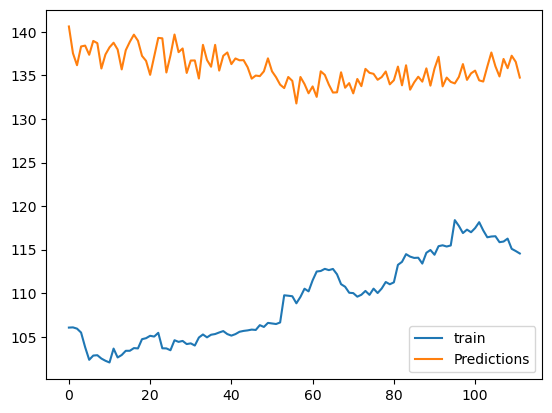

In [103]:
plt.figure()
plt.plot(datax['Close'][101:213].values)
plt.plot(valid[['predictions']])
plt.legend(['train', 'Predictions'], loc='lower right')
plt.show()

In [104]:
error_main = np.sqrt(np.abs(datax['Close'][101:213].values -valid[['predictions']].values))
print(error_main)

[[5.87998718 5.87795492 5.89027594 ... 5.05275665 5.07792818 5.10542392]
 [5.61250647 5.61037732 5.62328465 ... 4.73881096 4.76564101 4.79492784]
 [5.48892901 5.4867519  5.49994937 ... 4.59177984 4.61946393 4.64967158]
 ...
 [5.58723761 5.58509882 5.59806444 ... 4.70885597 4.73585573 4.76532562]
 [5.52367507 5.52151166 5.53462625 ... 4.63325877 4.66069648 4.6906386 ]
 [5.35771487 5.35548442 5.36900457 ... 4.4340962  4.46275856 4.49401967]]


In [ ]:
error_main.shape

In [ ]:
error = np.mean(error_main, axis=1)
plt.plot(np.arange(790), error, color='blue')
plt.xlabel('Index')
plt.ylabel('RMSE')
plt.title('RMSE for Predicted Error')
plt.grid(True)
plt.show()

In [105]:
final_pred

array([140.62535095, 137.55133057, 136.17944336, 138.33084106,
       138.42903137, 137.37716675, 138.96772766, 138.71012878,
       135.79966736, 137.41114807, 138.23139954, 138.75907898,
       137.98269653, 135.69613647, 137.90145874, 138.86463928,
       139.68513489, 138.98820496, 137.24916077, 136.67523193,
       135.0730896 , 137.18714905, 139.31448364, 139.26608276,
       135.34205627, 137.29518127, 139.70204163, 137.67704773,
       138.10021973, 135.29179382, 136.7149353 , 136.72512817,
       134.64697266, 138.5171814 , 136.77383423, 136.00444031,
       138.51705933, 135.56082153, 137.25666809, 137.63856506,
       136.30406189, 136.95315552, 136.74327087, 136.75994873,
       135.94570923, 134.63563538, 134.98991394, 134.92424011,
       135.47349548, 136.9651947 , 135.47793579, 134.79577637,
       133.94549561, 133.55303955, 134.82548523, 134.3770752 ,
       131.78730774, 134.82498169, 134.0174408 , 132.95362854,
       133.74255371, 132.54243469, 135.47723389, 135.06